In [22]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from keras.preprocessing.image import img_to_array, load_img
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/kaggle/input/images/train.csv')
df.head()

,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3


In [5]:
!pwd

/kaggle/working


In [6]:
image_path = '/kaggle/input/images/Images/train'

In [7]:
X = np.array([img_to_array(load_img(image_path+ '/' +df['filename'][i], target_size=(28,28,1), color_mode='grayscale'))
              for i in tqdm(range(df.shape[0]))
              ]).astype('float32')

  0%|          | 0/49000 [00:00<?, ?it/s]

In [8]:
y = df['label']

In [9]:
print(X.shape, y.shape)

(49000, 28, 28, 1) (49000,)


4


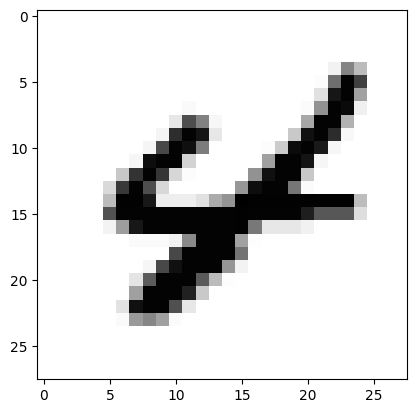

In [10]:
image_index = 0
print(y[image_index])
plt.imshow(X[image_index].reshape(28,28), cmap='Greys')

2


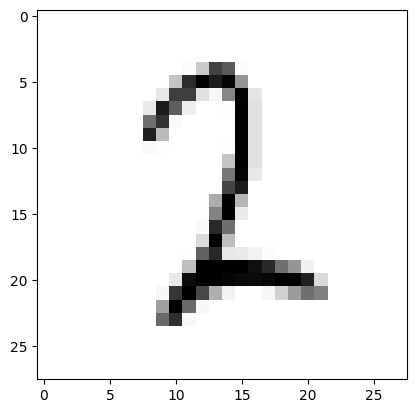

In [11]:
image_index = 10
print(y[image_index])
plt.imshow(X[image_index].reshape(28,28), cmap='Greys')

7


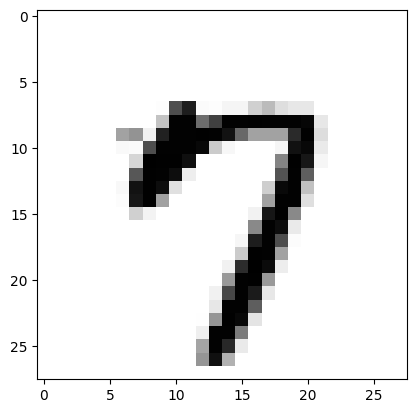

In [12]:
image_index = 100
print(y[image_index])
plt.imshow(X[image_index].reshape(28,28), cmap='Greys')

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=np.array(y))

In [14]:
x_train /= 255
x_test /= 255

In [15]:
input_shape = (28,28,1)
output_class = 10

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# define the model
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.3))
model.add(Dense(output_class, activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
# train the model
model.fit(x=x_train, y=y_train, batch_size=32, epochs=30, validation_data=(x_test, y_test))

Epoch 1/30
  85/1149 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6154 - loss: 1.2642

I0000 00:00:1712465655.255014      93 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1712465655.271741      93 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1149/1149 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8579 - loss: 0.4656

W0000 00:00:1712465659.944168      96 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712465660.647687      93 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1149/1149 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8580 - loss: 0.4654 - val_accuracy: 0.9661 - val_loss: 0.1135
Epoch 2/30
  85/1149 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9711 - loss: 0.1159

W0000 00:00:1712465661.775741      94 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1149/1149 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9642 - loss: 0.1192 - val_accuracy: 0.9730 - val_loss: 0.0875
Epoch 3/30
1149/1149 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9762 - loss: 0.0770 - val_accuracy: 0.9788 - val_loss: 0.0690
Epoch 4/30
1149/1149 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9799 - loss: 0.0625 - val_accuracy: 0.9793 - val_loss: 0.0677
Epoch 5/30
1149/1149 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9853 - loss: 0.0448 - val_accuracy: 0.9791 - val_loss: 0.0747
Epoch 6/30
1149/1149 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9861 - loss: 0.0420 - val_accuracy: 0.9807 - val_loss: 0.0707
Epoch 7/30
1149/1149 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9895 - loss: 0.0320 - val_accuracy: 0.9828 - val_loss: 0.0633
Epoch 8/30
1149/1149 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9898 - loss: 0.0310 - val_accuracy: 0.9789 - val_loss: 0.0790
Epoch 9/30
1149/1149 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9899 - loss: 0.0298 - val_accurac

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step
Predicted output: 1


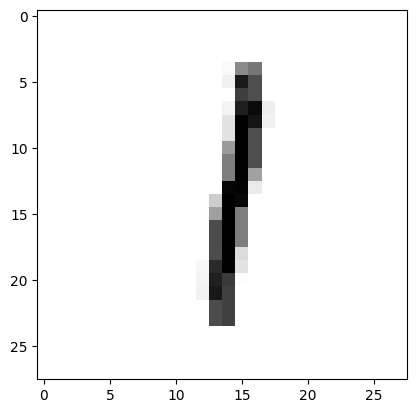

In [18]:
image_index = 10
# print("Original output:",y_test[image_index])
plt.imshow(x_test[image_index].reshape(28,28), cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1,28,28,1))
print("Predicted output:", pred.argmax())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted output: 8


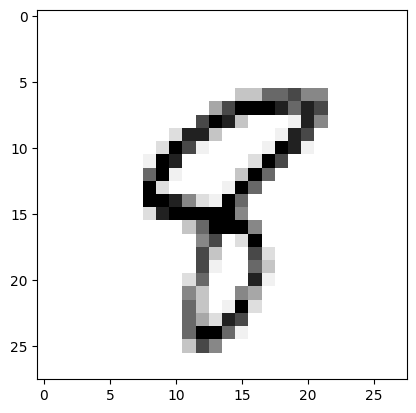

In [19]:
image_index = 100
# print("Original output:",y_test[image_index])
plt.imshow(x_test[image_index].reshape(28,28), cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1,28,28,1))
print("Predicted output:", pred.argmax())